In [74]:
import pandas as pd


In [75]:
fd = pd.read_csv("BBC News Train.csv")

In [76]:
fd

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [ ]:
fd.shape

(933, 3)

In [ ]:
test= pd.read_csv("BBC News Test.csv")

In [ ]:
test.shape

(735, 2)

In [ ]:
test

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
...,...,...
730,1923,eu to probe alitalia state aid the european ...
731,373,u2 to play at grammy awards show irish rock ba...
732,1704,sport betting rules in spotlight a group of mp...
733,206,alfa romeos to get gm engines fiat is to sto...


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  933 non-null    int64 
 1   Text       933 non-null    object
 2   Category   932 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.0+ KB


# check no of categories

In [12]:
fd['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment', nan],
      dtype=object)

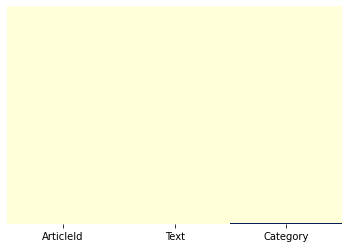

In [17]:
sns.heatmap(fd.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

# No null values

Create another column called length of nwes

In [83]:
fd['Length of News']=fd['Text'].str.len()

In [19]:
fd

,ArticleId,Text,Category,Length of News
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866
1,154,german business confidence slides german busin...,business,2016
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104
3,1976,lifestyle governs mobile choice faster bett...,tech,3618
4,917,enron bosses in $168m payout eighteen former e...,business,2190
...,...,...,...,...
928,1710,assembly ballot papers missing hundreds of b...,politics,1876
929,488,wolves appoint hoddle as manager glenn hoddle ...,sport,1396
930,992,china s shanda buys stake in sina chinese onli...,business,1760
931,1024,radcliffe tackles marathon tasks paula radclif...,sport,4278


In [20]:
import seaborn as sns

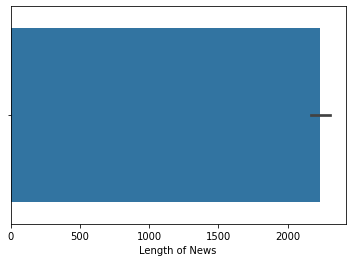

In [21]:
sns.barplot(fd['Length of News'])

# Lets try Dist plot

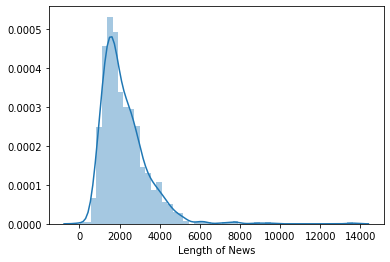

In [22]:
sns.distplot(fd['Length of News'])

# Import word cloud

In [23]:
from wordcloud import  WordCloud

# Write a function for word cloud drawing

In [27]:
def wc(word):
     wcd = WordCloud(width=1000, height=600, random_state=21, max_font_size=90).generate(word)
     plt.axis('off')
     plt.figure(figsize=(11, 8))
     plt.imshow(wcd, interpolation="bilinear")
     plt.show()

# draw the word cloud for each category

Sports


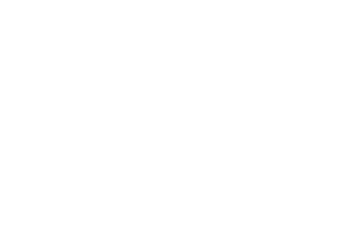

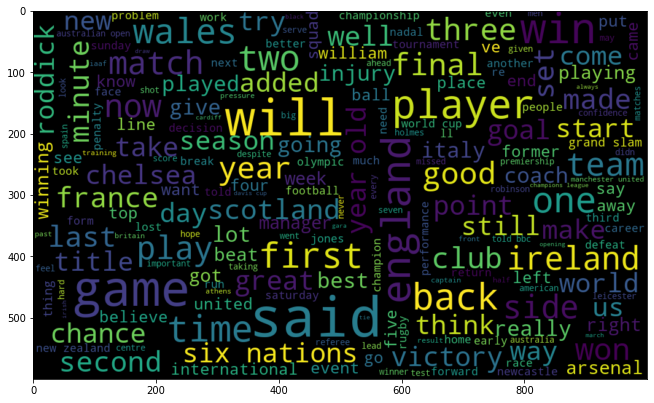

In [29]:
dr=fd[fd.Category=="sport"]
txt=dr.Text.values
word =" ".join(txt)
wc(word)

Political

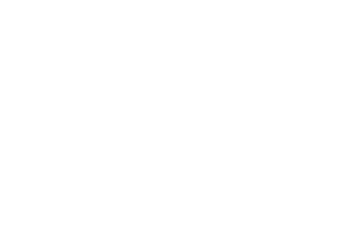

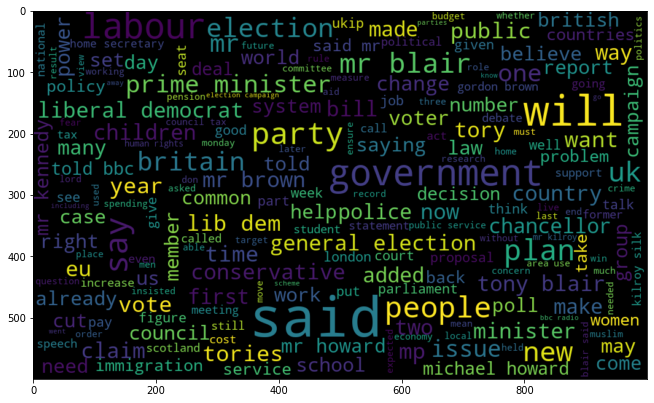

In [30]:
dr=fd[fd.Category=="politics"]
txt=dr.Text.values
word =" ".join(txt)
wc(word)

for Entertainment

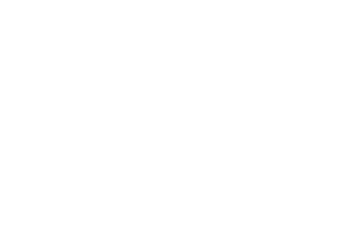

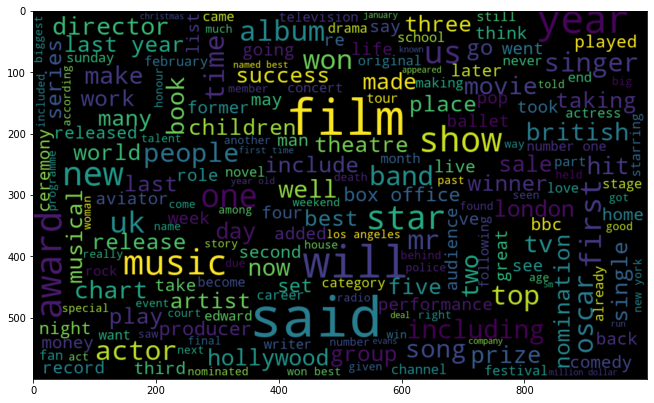

In [31]:
dr=fd[fd.Category=="entertainment"]
txt=dr.Text.values
word =" ".join(txt)
wc(word)

for Technology

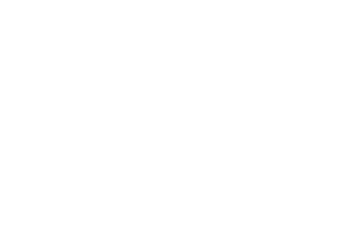

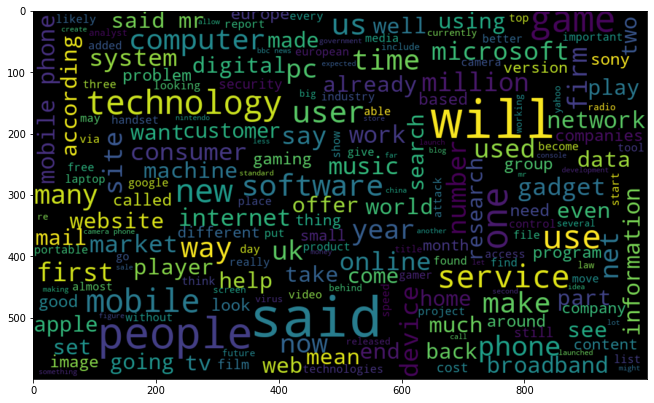

In [32]:
dr=fd[fd.Category=="tech"]
txt=dr.Text.values
word =" ".join(txt)
wc(word)

For the Business category

dr=fd[fd.Category=="business"]
txt=dr.Text.values
word =" ".join(txt)
wc(word)

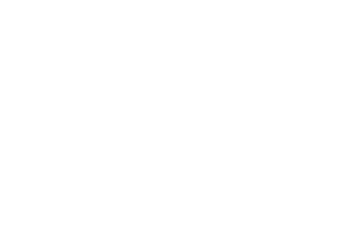

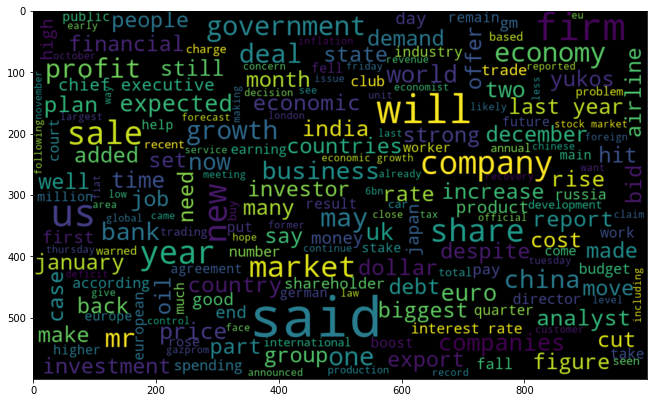

In [33]:
dr=fd[fd.Category=="business"]
txt=dr.Text.values
word =" ".join(txt)
wc(word)

# Now its time to perform feature engineering

Write a code for feature engeniring for the paraing the given text

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [50]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
import re

In [46]:
from nltk.tokenize import word_tokenize

In [47]:
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS

In [48]:
def phtxt(txt):
    txt = txt.lower().replace('\n',' ').replace('\r','').strip()
    txt = re.sub(' +', ' ', txt)
    txt = re.sub(r'[^\w\s]','',txt)
    sw = set(stopwords.words('english')) 
    wt = word_tokenize(txt) 
    filter = [w for w in wt if not w in sw] 
    filter = [] 
    for i in wt: 
        if i not in sw: 
            filter.append(i) 
    
    txt = " ".join(filter)
    return txt

In [84]:
fd["pharase text"]=fd["Text"].apply(phtxt)

In [85]:
fd

,ArticleId,Text,Category,Category_target,Length of News,pharase text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,0,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,0,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,4,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,0,2190,enron bosses 168m payout eighteen former enron...
...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,1,1266,double eviction big brother model caprice holb...
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,1,3111,dj double act revamp chart show dj duo jk joel...
1487,1590,weak dollar hits reuters revenues at media gro...,business,0,1370,weak dollar hits reuters revenues media group ...
1488,1587,apple ipod family expands market apple has exp...,tech,4,3242,apple ipod family expands market apple expande...


**now we have to convert it into binary for topic selection by encoding**

inport all the libraries here

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer

# Now convert from object to string

In [78]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [79]:
#fd['Text'].astype(str)
fd['Category']=fd['Category'].astype(str)
#fd['pharase text'].astype(str)

In [80]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [81]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
fd['Category_target']= label_encoder.fit_transform(fd['Category']) 

In [82]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ArticleId        1490 non-null   int64 
 1   Text             1490 non-null   object
 2   Category         1490 non-null   object
 3   Category_target  1490 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.7+ KB


In [86]:
fd

,ArticleId,Text,Category,Category_target,Length of News,pharase text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,0,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,0,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,4,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,0,2190,enron bosses 168m payout eighteen former enron...
...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,1,1266,double eviction big brother model caprice holb...
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,1,3111,dj double act revamp chart show dj duo jk joel...
1487,1590,weak dollar hits reuters revenues at media gro...,business,0,1370,weak dollar hits reuters revenues media group ...
1488,1587,apple ipod family expands market apple has exp...,tech,4,3242,apple ipod family expands market apple expande...


In [87]:
fd.to_csv("Train_pro.csv")

In [92]:
X_train, X_test, y_train, y_test = train_test_split(fd['pharase text'], 
                                                    fd['Category_target'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [93]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [94]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

[[0.0894863  0.         0.         ... 0.         0.0463896  0.06766975]
 [0.05501963 0.         0.07169191 ... 0.03972773 0.08176571 0.07044504]
 [0.         0.         0.         ... 0.11423937 0.13886684 0.        ]
 ...
 [0.13256211 0.         0.17273162 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.04393444 0.         0.        ]]
(298, 300)


In [98]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9194630872483222
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        76
           1       0.94      0.94      0.94        47
           2       0.89      0.85      0.87        55
           3       0.96      0.98      0.97        65
           4       0.88      0.96      0.92        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



In [99]:
model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9429530201342282
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298

